In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/MZ세대 문화여가 활동 특징_20240424.csv')
df.head()

,응답자ID,조사시작일자,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,236099,20240424,M,20대,서울특별시,700만원 이상,스트레스 해소를 위해,남는 시간을 보내기 위해,2,10,50,20,5,25,0,게임,볼링_ 당구-포켓볼 직접 하기,구기스포츠 직접 하기,친구-이성친구 만남,낮잠자기
1,289713,20240424,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
2,306059,20240424,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음
3,332896,20240424,F,30대,서울특별시,300만원 미만,자기 계발을 위해,건강 관리를 위해,3,10,10,40,30,20,0,헬스-보디빌딩 직접 하기,어학-기술-자격증 취득,영상 컨텐츠 시청,등산 직접 하기,친구-이성친구 만남
4,335203,20240424,M,20대,부산광역시,300이상500만원 미만,자기만족-즐거움을 위해,건강 관리를 위해,4,10,40,15,30,15,0,독서,등산 직접 하기,없음,없음,없음


In [2]:
ID = df['응답자ID'].copy()
ID.head(3)

0    236099
1    289713
2    306059
Name: 응답자ID, dtype: int64

In [3]:
df = df.drop(columns=['응답자ID','조사시작일자'])
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,서울특별시,700만원 이상,스트레스 해소를 위해,남는 시간을 보내기 위해,2,10,50,20,5,25,0,게임,볼링_ 당구-포켓볼 직접 하기,구기스포츠 직접 하기,친구-이성친구 만남,낮잠자기
1,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
2,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음


- 1. 라이브러리 및 데이터 확인
  2. 데이터 탐색(EDA)
  3. 데이터 전처리 및 분리

### 데이터 탐색(EDA)

In [4]:
df.shape

(525, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   성별구분코드          525 non-null    object
 1   연령대구분명          525 non-null    object
 2   답변자거주지역명        525 non-null    object
 3   가구소득정도명         525 non-null    object
 4   레저시간사용목적1순위값    525 non-null    object
 5   레저시간사용목적2순위값    525 non-null    object
 6   평일일평균레저시간값      525 non-null    int64 
 7   주말일평균레저시간값      525 non-null    int64 
 8   레저시간휴식오락사용비율    525 non-null    int64 
 9   레저시간취미사용비율      525 non-null    int64 
 10  레저시간본인계발사용비율    525 non-null    int64 
 11  레저시간대인관계교제사용비율  525 non-null    int64 
 12  레저시간기타사용비율      525 non-null    int64 
 13  관심레저활동1순위값      525 non-null    object
 14  관심레저활동2순위값      525 non-null    object
 15  관심레저활동3순위값      525 non-null    object
 16  관심레저활동4순위값      525 non-null    object
 17  관심레저활동5순위값      525 non-null    object
dtypes: int64(7

In [6]:
df.isnull().sum()

성별구분코드            0
연령대구분명            0
답변자거주지역명          0
가구소득정도명           0
레저시간사용목적1순위값      0
레저시간사용목적2순위값      0
평일일평균레저시간값        0
주말일평균레저시간값        0
레저시간휴식오락사용비율      0
레저시간취미사용비율        0
레저시간본인계발사용비율      0
레저시간대인관계교제사용비율    0
레저시간기타사용비율        0
관심레저활동1순위값        0
관심레저활동2순위값        0
관심레저활동3순위값        0
관심레저활동4순위값        0
관심레저활동5순위값        0
dtype: int64

In [7]:
df.value_counts('연령대구분명')

연령대구분명
50대    123
40대    112
60대    109
30대     94
20대     87
Name: count, dtype: int64

In [8]:
df['연령대구분명']

0      20대
1      20대
2      20대
3      30대
4      20대
      ... 
520    30대
521    20대
522    60대
523    40대
524    20대
Name: 연령대구분명, Length: 525, dtype: object

In [9]:
# 우리 목표인 2030의 응답만 추출
cond20s = (df['연령대구분명']=='20대')
cond30s = (df['연령대구분명']=='30대')
df = df[cond20s | cond30s]
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,서울특별시,700만원 이상,스트레스 해소를 위해,남는 시간을 보내기 위해,2,10,50,20,5,25,0,게임,볼링_ 당구-포켓볼 직접 하기,구기스포츠 직접 하기,친구-이성친구 만남,낮잠자기
1,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
2,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음


In [10]:
df.value_counts('가구소득정도명')

가구소득정도명
300만원 미만         47
300이상500만원 미만    41
500이상700만원 미만    32
700만원 이상         32
무응답              29
Name: count, dtype: int64

In [11]:
# 우리 서비스의 최종 목표는 은둔형 외톨이들이 자신감을 찾아 일반 직업활동을 하는 것으로 둔다.
# 그렇기 때문에, 현재 소득 300만원 미만의 2030 청년들의 여가활동/문화활동/취미활동이,
# 고립 생활에서 갓 벗어나 평범한 직업활동을 하는 사회 청년이 된 은둔형 외톨이들이 하게 될, 여가활동/문화활동/취미활동이 될 것이다.
condmoney = (df['가구소득정도명']=='300만원 미만')
df = df[condmoney]
df = df.reset_index(drop=True)
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
1,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음
2,F,30대,서울특별시,300만원 미만,자기 계발을 위해,건강 관리를 위해,3,10,10,40,30,20,0,헬스-보디빌딩 직접 하기,어학-기술-자격증 취득,영상 컨텐츠 시청,등산 직접 하기,친구-이성친구 만남


In [78]:
df.shape

(47, 18)

In [79]:
df['연령대구분명'].value_counts()

연령대구분명
20대    29
30대    18
Name: count, dtype: int64

In [80]:
df['가구소득정도명'].value_counts()

가구소득정도명
300만원 미만    47
Name: count, dtype: int64

# 시각화

## 레저시간사용목적 에 대한 분석

In [12]:
df['레저시간사용목적1순위값'].value_counts()

레저시간사용목적1순위값
자기만족-즐거움을 위해           13
스트레스 해소를 위해            11
마음의 안정-휴식을 위해           8
가족-지인 등과 시간을 보내기 위해     5
남는 시간을 보내기 위해           5
대인 관계-교제를 위해            3
자기 계발을 위해               1
건강 관리를 위해               1
Name: count, dtype: int64

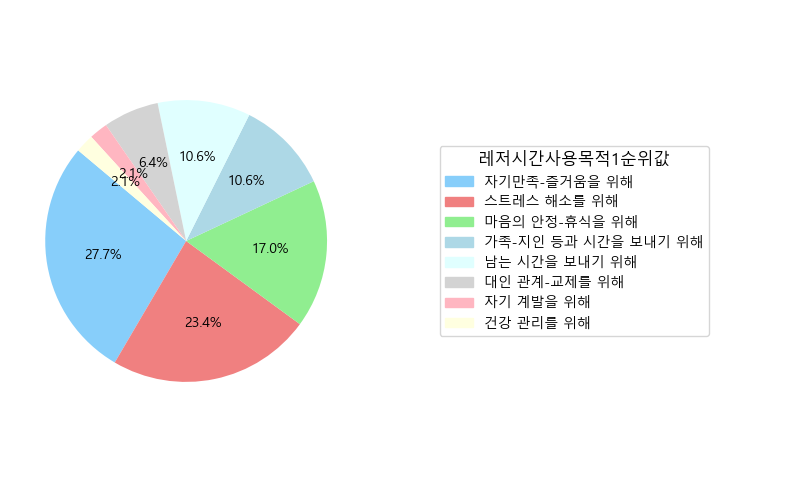

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.patches import Patch

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 시각화를 위한 데이터 준비
labels = df['레저시간사용목적1순위값'].value_counts().index
sizes = df['레저시간사용목적1순위값'].value_counts().values

# 색상 리스트 생성
colors = ['lightskyblue', 'lightcoral', 'lightgreen', 'lightblue', 'lightcyan', 'lightgrey', 'lightpink', 'lightyellow']
# 파이차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# 파이차트 그리기
patches, _, _ = axs[0].pie(sizes, startangle=140, autopct='%1.1f%%', colors=colors)

# 범례 색상 지정
legend_patches = [Patch(color=color) for color in colors]

# 범례 추가
axs[1].axis('off')
axs[1].legend(legend_patches, labels, loc="center left", title="레저시간사용목적1순위값", title_fontsize='large')

plt.show()

In [14]:
df['레저시간사용목적2순위값'].value_counts()

레저시간사용목적2순위값
가족-지인 등과 시간을 보내기 위해    13
마음의 안정-휴식을 위해           8
스트레스 해소를 위해             7
자기만족-즐거움을 위해            6
자기 계발을 위해               5
없음                      4
건강 관리를 위해               3
남는 시간을 보내기 위해           1
Name: count, dtype: int64

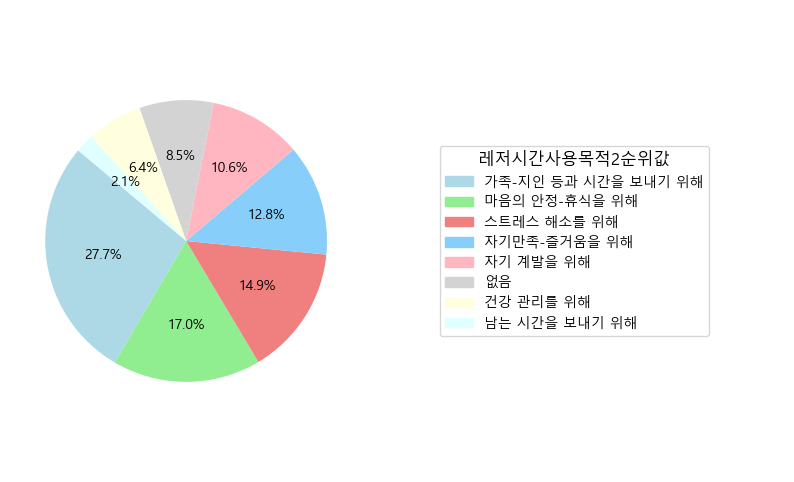

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from matplotlib.patches import Patch

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 시각화를 위한 데이터 준비
labels = df['레저시간사용목적2순위값'].value_counts().index
sizes = df['레저시간사용목적2순위값'].value_counts().values

# 색상 리스트 생성
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightpink', 'lightgrey', 'lightyellow', 'lightcyan']

# 파이차트 그리기
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# 파이차트 그리기
patches, _, _ = axs[0].pie(sizes, startangle=140, autopct='%1.1f%%', colors=colors)

# 범례 색상 지정
legend_patches = [Patch(color=color) for color in colors]

# 범례 추가
axs[1].axis('off')
axs[1].legend(legend_patches, labels, loc="center left", title="레저시간사용목적2순위값", title_fontsize='large')

plt.show()

### 레저시간 사용목적 1&2순위 데이터 간의 관계를 이해하기 위해서 교차 테이블(Cross-tabulation)을 사용하여 두 변수 간의 '빈도'를 비교. 
### 이를 통해 각 투표가 얼마나 많이 발생하는지, 얼마나 자주 함께 발생하는지 등을 확인가능.
### 위 코드를 실행하면 각 레저시간사용목적값의 조합에 대한 빈도를 히트맵으로 시각화. 이를 통해 각 값들 간의 연관성을 파악.

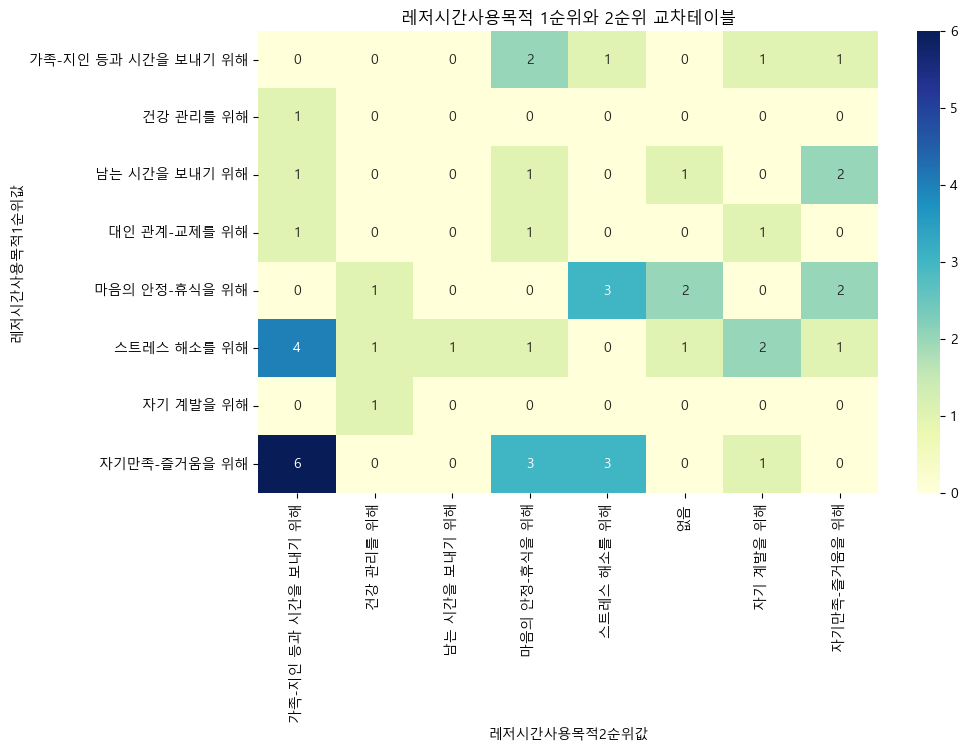

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 레저시간사용목적값에 대한 교차테이블 생성
cross_tab = pd.crosstab(df['레저시간사용목적1순위값'], df['레저시간사용목적2순위값'])

# 히트맵으로 교차테이블 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.title('레저시간사용목적 1순위와 2순위 교차테이블')
plt.xlabel('레저시간사용목적2순위값')
plt.ylabel('레저시간사용목적1순위값')
plt.show()

### 레저시간 사용목적 1,2순위 결과 :
- 1순위 가장 큰 목적은 레저시간을 자기만족-즐거움을 위해 사용하고,
- 1순위 두번째 큰 목적은 스트레스 해소를 위해 사용한다.

- 2순위 가장 큰 목적은 가족-지인 등과 시간을 보내기 위해 사용하고,
- 2순위 두번째 큰 목적은 마음의 안정-휴식을 위해 사용한다.

### ※ 2030청년들은 여가시간에, 자신들의 즐거움을 채우고 자신이 흥미있는 것을 하며 보낸다. 또한 스트레스를 해소하기 위해서도 사용한다.
### 그것들이 이루어진 후, 가족-지인 등과 시간을 보내거나 마음의 안정-휴식을 찾으며 여가를 보낸다.

In [17]:
df.head(3)

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,레저시간사용목적1순위값,레저시간사용목적2순위값,평일일평균레저시간값,주말일평균레저시간값,레저시간휴식오락사용비율,레저시간취미사용비율,레저시간본인계발사용비율,레저시간대인관계교제사용비율,레저시간기타사용비율,관심레저활동1순위값,관심레저활동2순위값,관심레저활동3순위값,관심레저활동4순위값,관심레저활동5순위값
0,M,20대,대전광역시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,2,10,10,60,10,20,0,헬스-보디빌딩 직접 하기,걷기-속보-조깅 직접 하기,독서,게임,친구-이성친구 만남
1,M,20대,세종특별자치시,300만원 미만,마음의 안정-휴식을 위해,스트레스 해소를 위해,3,7,50,30,20,0,0,산책-걷기,없음,없음,없음,없음
2,F,30대,서울특별시,300만원 미만,자기 계발을 위해,건강 관리를 위해,3,10,10,40,30,20,0,헬스-보디빌딩 직접 하기,어학-기술-자격증 취득,영상 컨텐츠 시청,등산 직접 하기,친구-이성친구 만남


## 평일/ 주말 의 평균레저시간에 대한 분석

In [18]:
df['평일일평균레저시간값'].value_counts()

평일일평균레저시간값
2     13
3     13
5      7
1      5
4      3
6      2
7      2
10     1
8      1
Name: count, dtype: int64

In [19]:
df['평일일평균레저시간값'].describe().T

count    47.000000
mean      3.425532
std       1.975334
min       1.000000
25%       2.000000
50%       3.000000
75%       5.000000
max      10.000000
Name: 평일일평균레저시간값, dtype: float64

### boxplot

<Axes: ylabel='평일일평균레저시간값'>

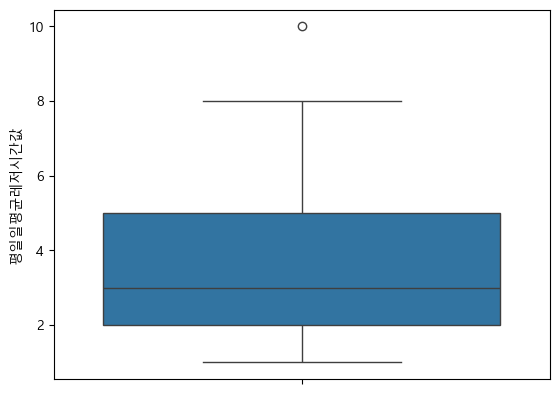

In [20]:
# 이상치를 확인하지만 결국 그 기록 또한 중요하기 때문에 대체/삭제 하지 않겠다.
import seaborn as sns

sns.boxplot(df['평일일평균레저시간값'])

In [21]:
df_weekdays = pd.DataFrame(df['평일일평균레저시간값'].value_counts())
df_weekdays

,count
평일일평균레저시간값,
2,13
3,13
5,7
1,5
4,3
6,2
7,2
10,1
8,1


In [22]:
df_weekdays.index

Index([2, 3, 5, 1, 4, 6, 7, 10, 8], dtype='int64', name='평일일평균레저시간값')

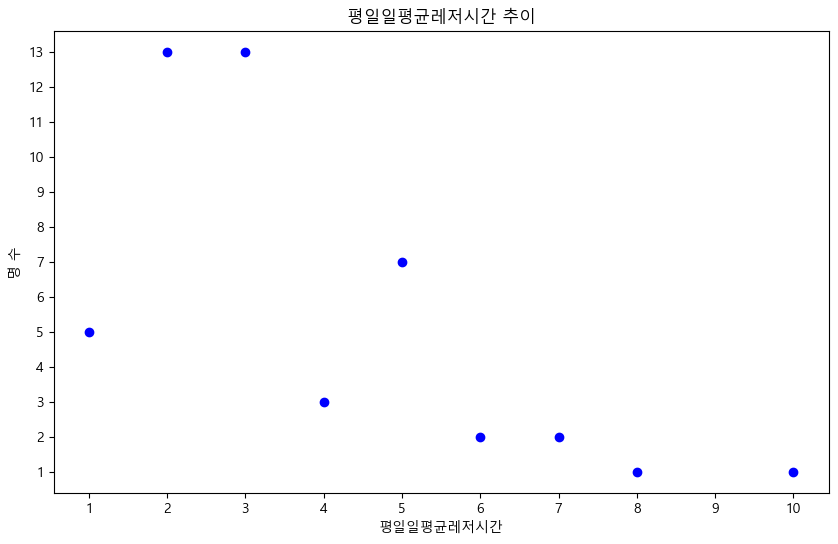

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df_weekdays.index, df_weekdays['count'], color='blue')
plt.title('평일일평균레저시간 추이')
plt.xlabel('평일일평균레저시간')
plt.ylabel('명 수')
plt.xticks(np.arange(1,11,1))
plt.yticks(np.arange(1,14,1))
plt.show()

## 평일 레저시간 분석결과

### 2030 청년들은 평일 2~3 시간 정도 여가시간을 보내는 것이 보통이다.
### 평일에 보내는 레저시간의 평균은 3시간 정도.

In [24]:
df['주말일평균레저시간값'].value_counts()

주말일평균레저시간값
10    9
8     9
1     5
7     4
15    4
5     3
2     3
4     3
14    2
6     2
0     1
12    1
3     1
Name: count, dtype: int64

In [25]:
df['주말일평균레저시간값'].describe().T

count    47.000000
mean      7.297872
std       4.237077
min       0.000000
25%       4.000000
50%       8.000000
75%      10.000000
max      15.000000
Name: 주말일평균레저시간값, dtype: float64

In [26]:
df_weekends = pd.DataFrame(df['주말일평균레저시간값'].value_counts())
df_weekends

,count
주말일평균레저시간값,
10,9
8,9
1,5
7,4
15,4
5,3
2,3
4,3
14,2


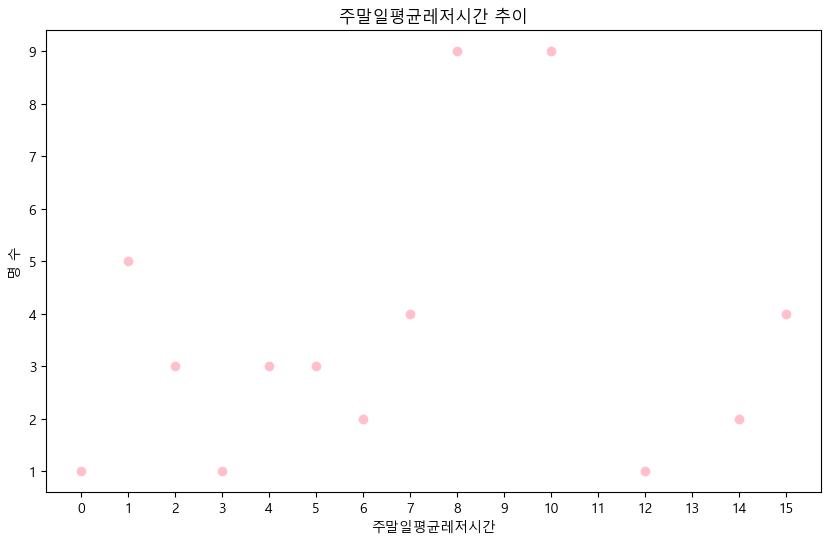

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df_weekends.index, df_weekends['count'], color='pink')
plt.title('주말일평균레저시간 추이')
plt.xlabel('주말일평균레저시간')
plt.ylabel('명 수')
plt.xticks(np.arange(0,16,1))
plt.yticks(np.arange(1,10,1))
plt.show()

## 주말 레저시간 분석결과

### 2030 청년들은 주말 8~10 시간 정도 여가시간을 보내는 것이 보통이다.
### 주말에 보내는 레저시간의 평균은 7시간30분 정도.

## 레저시간 사용비율 분석

In [28]:
df['레저시간휴식오락사용비율'].value_counts()

레저시간휴식오락사용비율
20     10
50      9
30      5
80      4
10      3
5       3
60      3
90      3
100     3
40      2
45      1
3       1
Name: count, dtype: int64

In [83]:
df['레저시간휴식오락사용비율'].describe().T

count     47.000000
mean      43.468085
std       28.931592
min        3.000000
25%       20.000000
50%       40.000000
75%       60.000000
max      100.000000
Name: 레저시간휴식오락사용비율, dtype: float64

In [29]:
df_play = pd.DataFrame(df['레저시간휴식오락사용비율'].value_counts())
df_play

,count
레저시간휴식오락사용비율,
20,10
50,9
30,5
80,4
10,3
5,3
60,3
90,3
100,3


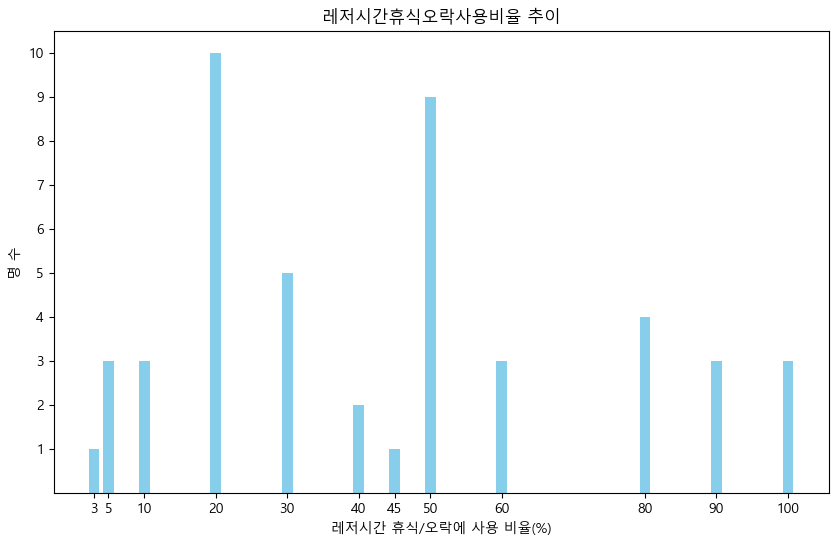

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_play.index, df_play['count'], color='skyblue', width=1.5)
plt.title('레저시간휴식오락사용비율 추이')
plt.xlabel('레저시간 휴식/오락에 사용 비율(%)')
plt.ylabel('명 수')
plt.xticks(df_play.index)
plt.yticks(np.arange(1,11,1))
plt.show()

## 레저시간 휴식/오락에 사용 비율 분석 결과
- 2030청년들은 여가시간 동안 휴식/오락에 20% or 50%를 소모함.

In [31]:
df['레저시간취미사용비율'].value_counts()

레저시간취미사용비율
0     16
20    11
10     8
30     4
40     2
5      2
60     1
25     1
50     1
2      1
Name: count, dtype: int64

In [32]:
df_hobby = pd.DataFrame(df['레저시간취미사용비율'].value_counts())
df_hobby

,count
레저시간취미사용비율,
0,16
20,11
10,8
30,4
40,2
5,2
60,1
25,1
50,1


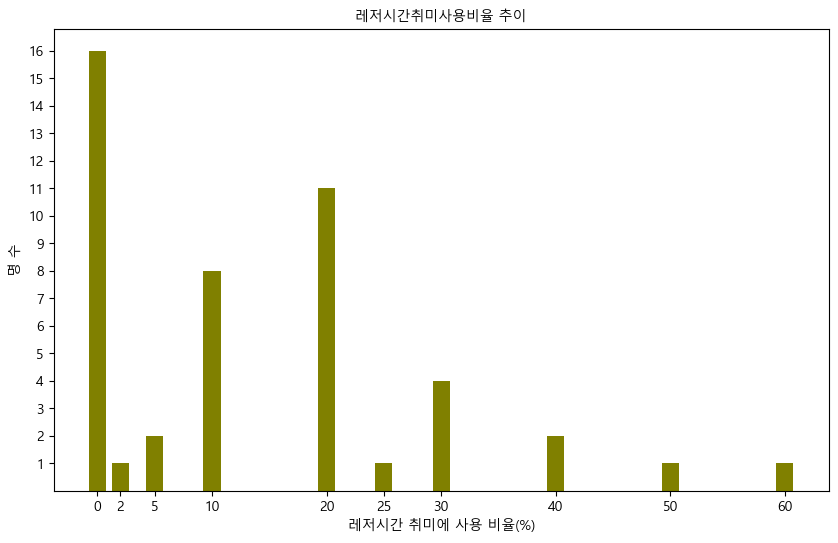

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_hobby.index, df_hobby['count'], color='olive', width=1.5)
plt.title('레저시간취미사용비율 추이',fontproperties=font_prop)
plt.xlabel('레저시간 취미에 사용 비율(%)',fontproperties=font_prop)
plt.ylabel('명 수',fontproperties=font_prop)
plt.xticks(df_hobby.index,fontproperties=font_prop)
plt.yticks(np.arange(1,17,1),fontproperties=font_prop)
plt.show()

## 레저시간 취미에 사용 비율 분석 결과
- 2030청년들은 여가시간 동안 취미활동을 하는 것에 흥미가 없다고 볼 수 있다.

In [39]:
df['레저시간본인계발사용비율'].value_counts()

레저시간본인계발사용비율
0     18
10    13
20     8
30     2
5      2
80     1
2      1
35     1
15     1
Name: count, dtype: int64

In [41]:
df_self = pd.DataFrame(df['레저시간본인계발사용비율'].value_counts())
df_self

,count
레저시간본인계발사용비율,
0,18
10,13
20,8
30,2
5,2
80,1
2,1
35,1
15,1


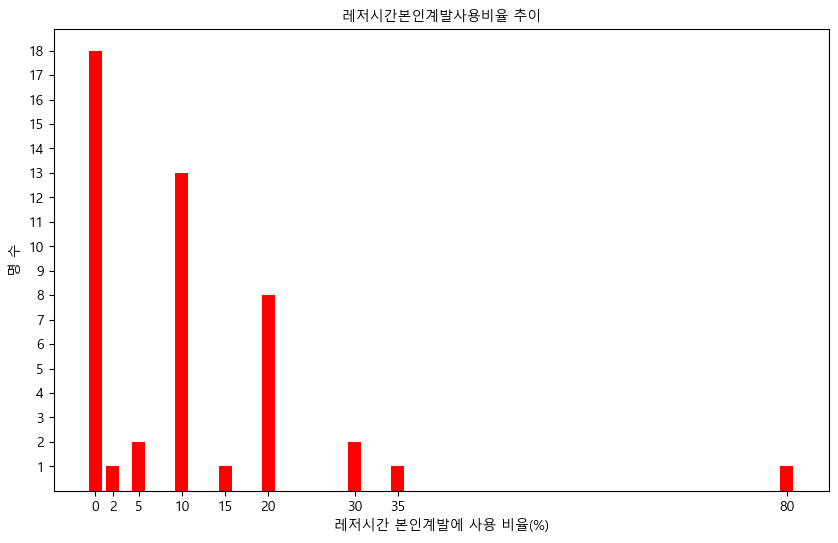

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_self.index, df_self['count'], color='red', width=1.5)
plt.title('레저시간본인계발사용비율 추이',fontproperties=font_prop)
plt.xlabel('레저시간 본인계발에 사용 비율(%)',fontproperties=font_prop)
plt.ylabel('명 수',fontproperties=font_prop)
plt.xticks(df_self.index,fontproperties=font_prop)
plt.yticks(np.arange(1,19,1),fontproperties=font_prop)
plt.show()

## 레저시간 본인계발에 사용 비율 분석 결과
- 여가시간이라는 특성 상 본인계발에 몰두하는 비율이 매우 적다.

In [44]:
df['레저시간대인관계교제사용비율'].value_counts()

레저시간대인관계교제사용비율
30    8
20    7
50    7
0     6
40    6
10    3
60    3
35    2
8     1
55    1
25    1
70    1
90    1
Name: count, dtype: int64

In [46]:
df_friend = pd.DataFrame(df['레저시간대인관계교제사용비율'].value_counts())
df_friend

,count
레저시간대인관계교제사용비율,
30,8
20,7
50,7
0,6
40,6
10,3
60,3
35,2
8,1


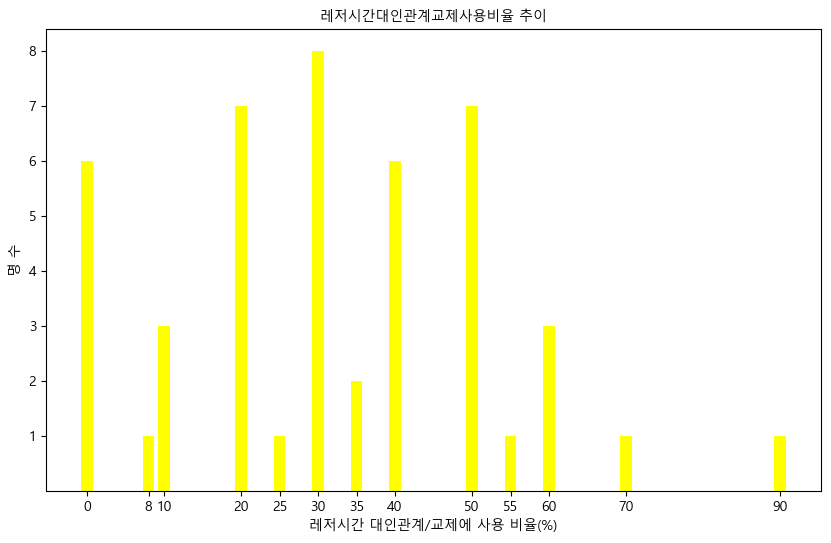

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.bar(df_friend.index, df_friend['count'], color='yellow', width=1.5)
plt.title('레저시간대인관계교제사용비율 추이',fontproperties=font_prop)
plt.xlabel('레저시간 대인관계/교제에 사용 비율(%)',fontproperties=font_prop)
plt.ylabel('명 수',fontproperties=font_prop)
plt.xticks(df_friend.index,fontproperties=font_prop)
plt.yticks(np.arange(1,9,1),fontproperties=font_prop)
plt.show()

In [48]:
df['레저시간대인관계교제사용비율'].describe().T

count    47.00000
mean     31.87234
std      20.65200
min       0.00000
25%      20.00000
50%      30.00000
75%      50.00000
max      90.00000
Name: 레저시간대인관계교제사용비율, dtype: float64

## 레저시간 대인관계/교제에 사용 비율 분석 결과
- 2030청년들은 60% 미만 정도에선 비교적 고루 사용하고 있다.

## 2030 관심 레저활동 1&2순위 분석

In [53]:
df['관심레저활동1순위값'].value_counts()

관심레저활동1순위값
게임                   5
영상 컨텐츠 시청            4
SNS -인터넷 커뮤니티 활동     3
국내 여행                3
헬스-보디빌딩 직접 하기        2
어학-기술-자격증 취득         2
산책-걷기                2
e스포츠 영상 시청           2
종교활동                 2
음악 직접 활동 및 수강하기      2
만화책 보기               1
음악 공연 관람             1
미용                   1
반려동물 돌보기             1
음주-유흥                1
기타 취미-오락-휴식          1
골프 직접 하기             1
소풍-피크닉               1
낚시                   1
격투 스포츠 영상 시청         1
갬블                   1
맛집-카페 탐방             1
가족-친지 만남             1
수다-잡담하기              1
춤-무용 직접 활동 및 수강하기    1
인테리어                 1
구기스포츠 직접 하기          1
국내 프로스포츠 현장 관람       1
걷기-속보-조깅 직접 하기       1
생활공예-원예              1
Name: count, dtype: int64

In [56]:
df_interest1 = pd.DataFrame(df['관심레저활동1순위값'].value_counts())
df_interest1

,count
관심레저활동1순위값,
게임,5
영상 컨텐츠 시청,4
SNS -인터넷 커뮤니티 활동,3
국내 여행,3
헬스-보디빌딩 직접 하기,2
어학-기술-자격증 취득,2
산책-걷기,2
e스포츠 영상 시청,2
종교활동,2


In [67]:
df['관심레저활동1순위값'].describe(include='object')

count     47
unique    30
top       게임
freq       5
Name: 관심레저활동1순위값, dtype: object

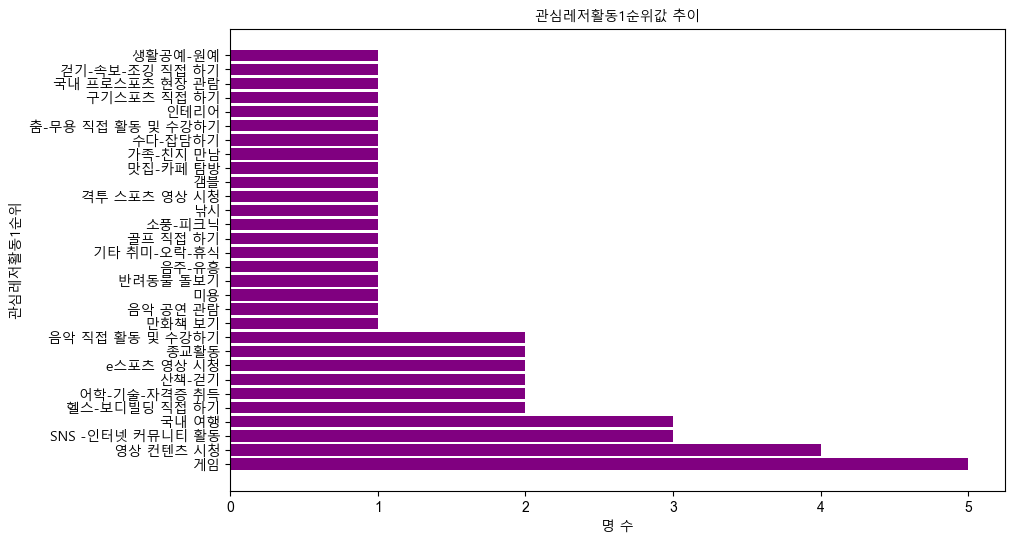

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.barh(df_interest1.index, df_interest1['count'], color='purple')
plt.title('관심레저활동1순위값 추이',fontproperties=font_prop)
plt.xlabel('명 수',fontproperties=font_prop)
plt.ylabel('관심레저활동1순위',fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.show()

In [69]:
df['관심레저활동2순위값'].value_counts()

관심레저활동2순위값
없음                     13
SNS -인터넷 커뮤니티 활동        4
게임                      4
어학-기술-자격증 취득            3
헬스-보디빌딩 직접 하기           3
영상 컨텐츠 시청               3
산책-걷기                   2
쇼핑                      2
친구-이성친구 만남              2
낮잠자기                    2
걷기-속보-조깅 직접 하기          1
맛집-카페 탐방                1
e스포츠 영상 시청              1
영화관 관람                  1
줄넘기-맨손체조-스트레칭 직접 하기     1
국내 프로스포츠 영상 시청          1
국내 프로스포츠 현장 관람          1
사진 촬영                   1
수영 직접 하기                1
Name: count, dtype: int64

In [70]:
df['관심레저활동2순위값'].describe(include='object')

count     47
unique    19
top       없음
freq      13
Name: 관심레저활동2순위값, dtype: object

In [71]:
df_interest2 = pd.DataFrame(df['관심레저활동2순위값'].value_counts())
df_interest2

,count
관심레저활동2순위값,
없음,13
SNS -인터넷 커뮤니티 활동,4
게임,4
어학-기술-자격증 취득,3
헬스-보디빌딩 직접 하기,3
영상 컨텐츠 시청,3
산책-걷기,2
쇼핑,2
친구-이성친구 만남,2


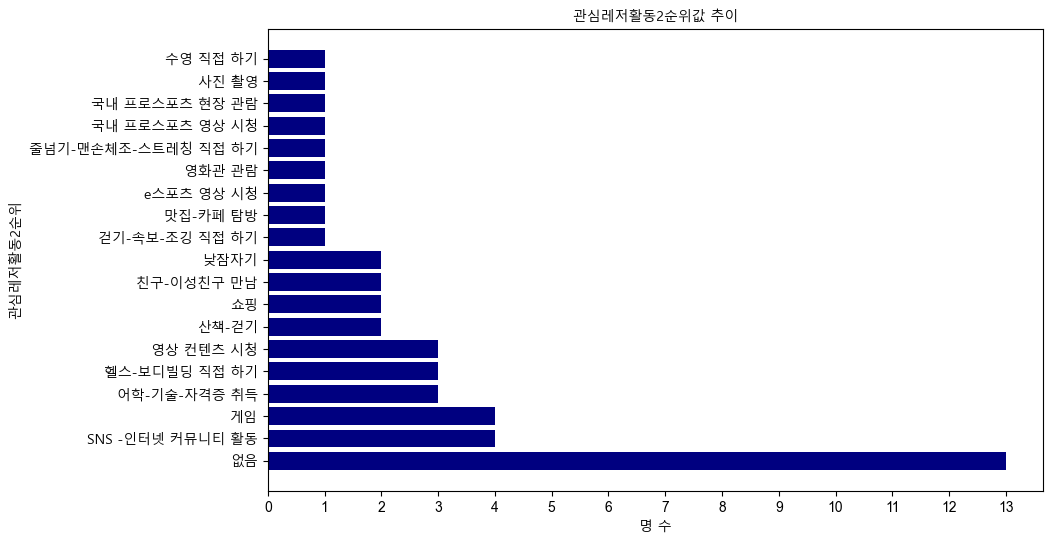

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.barh(df_interest2.index, df_interest2['count'], color='navy')
plt.title('관심레저활동2순위값 추이',fontproperties=font_prop)
plt.xlabel('명 수',fontproperties=font_prop)
plt.ylabel('관심레저활동2순위',fontproperties=font_prop)
plt.xticks(np.arange(0,14,1))
plt.yticks(fontproperties=font_prop)
plt.show()

### 관심레저활동 1,2순위 결과 :
- 게임, 인터넷 커뮤니티 활동, 영상 컨텐츠 시청 등
- 주로 2030청년들은 실내에서 할 수 있는 취미활동을 선호한다.

# 결론 : 
결론
2030 청년들은 즐거움과 스트레스 해소 등을 채워주는 여가 활동들을 가장 선호하고
다음으론 가족-지인 등 대인관계를 통해 할 수 있는 여가 활동을 보내며, 
마음의 안정과 휴식을 찾는 것도 선호하는 부류군이 있다.

자기만족/즐거움과 스트레스를 해소하는 걸 가장 선호하는 사람들은 대부분
2순위로 대인관계를 선호한다.

2030청년들은 여가시간을 휴식/오락을 통해 채우며,
여가시간을 취미로 보내는 사람은 거의 없거나 여가시간을 취미가 차지하는 비중이 매우 적다
(의문점? 취미라는 단어의 정의가 여가시간에 보내길 선호하는 활동이 아닌가? 이런 설문조사결과가 나온 이유를 알아보고 싶다.)

본인계발과 공부를 통해 여가시간을 채우는 걸 선호하는 사람은 극히 드물다.
따라서 만약 우리 이커머스 사이트에 자격증 반이나, 공부하는 기회를 제공하는 상품을 판매하면
이용자/선호자가 적을 것으로 예상된다.

대인관계/교제가 여가시간을 차지하는 비중은,
휴식/오락이 여가시간을 차지하는 비중보다 평균 10%정도 적다.(약 2시간)

그러므로 (휴식/오락)과 (대인관계/교제) 활동을 하는데 사용할 수 있는 상품을 판매한다면,
이용자가 있을 것으로 예상된다.

관심레저활동 1,2순위 분석결과
게임/인터넷커뮤니티/영상시청 등 2030청년들은 실내에서 할 수 있는 오락활동을 하며 여가시간을 보내는 걸 가장 선호한다.
관련 상품을 판매한다면 가장 수요자가 많을 것으로 예측되지만,

우리 목표가 은둔형 외톨이의 일상회복을 통한 [문화산업 부흥기여/취업(자기계발 상품을 선호하지 않을 것으로 예측됨으로 다른 관점이 없는 이상 버려야할듯)] 이기 때문에,
실내 활동에 사용되는 이커머스 상품을 팔면 수요자는 많겠지만 우리 서비스 목적에 큰 효과를 주지 못할 것이다. 

그럼 그 다음 관심레저활동 선호는 , 국내여행/헬스/산책/음악 같은  활동들이다.
이런 상품들을 어떻게 구상해야 할 지 앞으로 고민해봐야 할 일.

결국은 이런 데이터를 분석했던 이유는,

동일한 나이대의 일반인들이 여가시간을 보내는 방법에 대한 선호조사이기 때문에,
우리 서비스의 이커머스를 통해 친구들이 하는 여가활동을 체험해보면서,
은둔형 외톨이가 일상회복을 했을 때, 
사회에 잘 적응할 수 있을 거라는 기대감에 기반해서 진행했다.

  